In [2]:
!git clone http://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [3]:
%cd keras-retinanet/

/content/keras-retinanet


In [4]:
!pip install .

Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-1.0.0-cp37-cp37m-linux_x86_64.whl size=168023 sha256=72dfc6085c0cabfb4859260cf629f0f836b66ebf770572438b3e86da7cb02a62
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=b306054b8a43c737d334b140071514be154e04d9c5c295b3ea780b12471b9a3d
  Stored in directory: /root/.cache/pip/wheels/5f/09/a5/497a30fd9ad9964e98a1254d1e164bcd1b8a5eda36197ecb3c
Successfully built keras-retinanet keras-resnet


In [5]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/keras_retinanet
creating build/temp.linux-x86_64-3.7/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -

In [6]:
import numpy as np 
import requests
import matplotlib.pyplot as plt

import urllib
from PIL import Image

from keras_retinanet import models
from keras_retinanet.utils.image import preprocess_image,resize_image
from keras_retinanet.utils.visualization import draw_box,draw_caption
from keras_retinanet.utils.colors import label_color

In [12]:
# 'https://github.com/fizyr/keras-retinanet/releases/
urllib.request.urlretrieve('https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5')

('/tmp/tmp4s3hn2xq', <http.client.HTTPMessage at 0x7f3d4cd00350>)

In [14]:
model=models.load_model('/content/resnet50_coco_best_v2.1.0.h5')

In [15]:
!wget https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt

--2021-03-21 07:26:41--  https://lazyprogrammer.me/course_files/obj_detection/coco_categories.txt
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘coco_categories.txt’

coco_categories.txt     [ <=>                ]     621  --.-KB/s    in 0s      

2021-03-21 07:26:41 (9.37 MB/s) - ‘coco_categories.txt’ saved [621]



In [17]:
class_names=[l.rstrip() for l in open('coco_categories.txt')]
class_names

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 'dining table',
 'toilet',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [29]:
def show_image_with_predictions(img_path,threshold=0.6):
  img=np.array(Image.open(img_path))
  print('img_shape:',img.shape)

  img=img[:,:,:3]

  imp=preprocess_image(img)
  imp,scale=resize_image(img)
  boxes,scores,labels=model.predict_on_batch(np.expand_dims(imp,axis=0))
  boxes/=scale

  for box,score,label in zip(boxes[0],scores[0],labels[0]):
  
    if score<threshold:
      break

    box=box.astype(np.int32)
    color=label_color(label)
    draw_box(img,box,color=color)
    class_name=class_names[label]
    caption=f"{class_name}{score:3f}"
    draw_caption(img,box,caption)

  plt.axis('off')
  plt.imshow(img)
  plt.show()


--2021-03-21 07:39:55--  https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162736 (159K) [image/jpeg]
Saving to: ‘baseball.jpg.3’

baseball.jpg.3      100%[===================>] 158.92K  --.-KB/s    in 0.03s   

2021-03-21 07:39:56 (5.24 MB/s) - ‘baseball.jpg.3’ saved [162736/162736]

img_shape: (430, 638, 3)


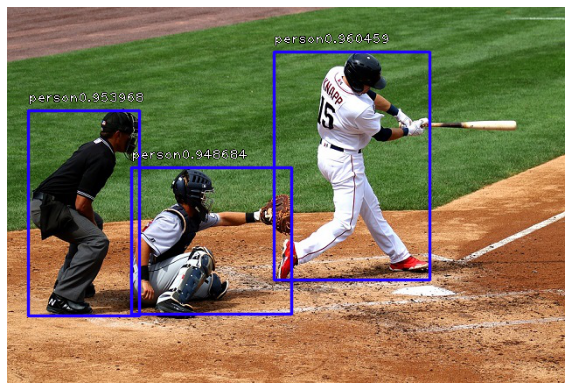

In [30]:
plt.rcParams['figure.figsize']=[10,10]
!wget https://lazyprogrammer.me/course_files/obj_detection/baseball.jpg
show_image_with_predictions('baseball.jpg')

--2021-03-21 07:40:56--  https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220485 (215K) [image/jpeg]
Saving to: ‘cars.jpg’

cars.jpg            100%[===================>] 215.32K  --.-KB/s    in 0.1s    

2021-03-21 07:40:57 (1.55 MB/s) - ‘cars.jpg’ saved [220485/220485]

img_shape: (666, 1000, 3)


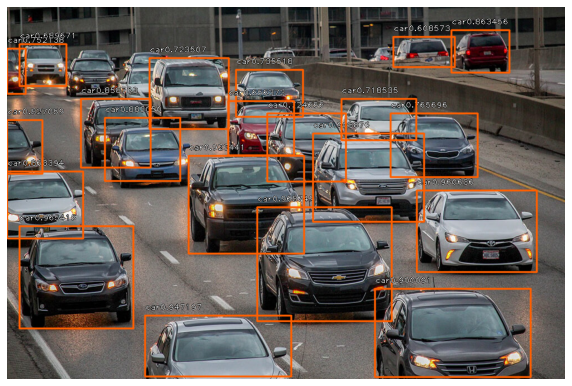

In [33]:
!wget https://lazyprogrammer.me/course_files/obj_detection/cars.jpg
show_image_with_predictions('cars.jpg')

--2021-03-21 07:42:09--  https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53698 (52K) [image/jpeg]
Saving to: ‘crosswalk.jpg’

crosswalk.jpg       100%[===================>]  52.44K  --.-KB/s    in 0.01s   

2021-03-21 07:42:09 (4.38 MB/s) - ‘crosswalk.jpg’ saved [53698/53698]

img_shape: (384, 512, 3)


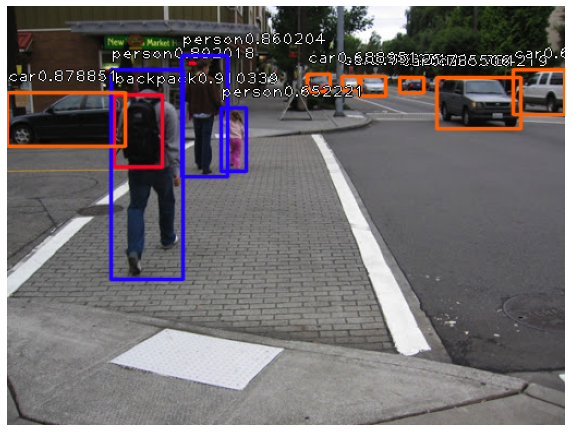

In [36]:
!wget https://lazyprogrammer.me/course_files/obj_detection/crosswalk.jpg
show_image_with_predictions('crosswalk.jpg')

--2021-03-21 08:37:58--  https://m.media-amazon.com/images/I/51ohtxF41YL.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to m.media-amazon.com (m.media-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56756 (55K) [image/jpeg]
Saving to: ‘51ohtxF41YL.jpg.4’

51ohtxF41YL.jpg.4   100%[===================>]  55.43K  --.-KB/s    in 0.01s   

2021-03-21 08:37:58 (4.38 MB/s) - ‘51ohtxF41YL.jpg.4’ saved [56756/56756]

img_shape: (500, 500, 3)


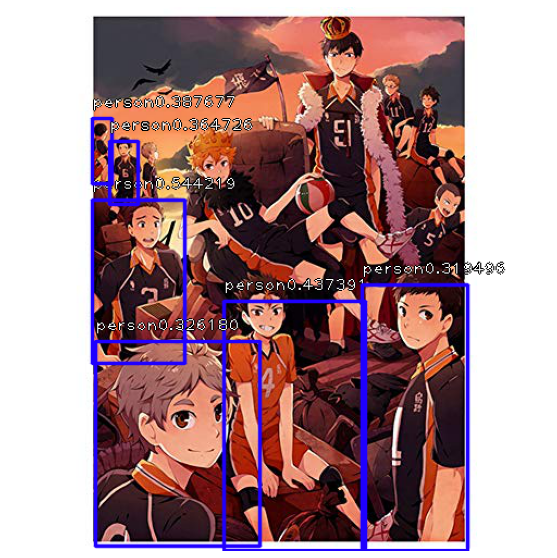

In [50]:
!wget https://m.media-amazon.com/images/I/51ohtxF41YL.jpg
show_image_with_predictions('51ohtxF41YL.jpg',threshold=0.3)

--2021-03-21 08:40:12--  https://afremov.com/images/product/image_2552.jpeg
Resolving afremov.com (afremov.com)... 34.218.54.198
Connecting to afremov.com (afremov.com)|34.218.54.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 350079 (342K) [image/jpeg]
Saving to: ‘image_2552.jpeg.1’

image_2552.jpeg.1   100%[===================>] 341.87K  1.02MB/s    in 0.3s    

2021-03-21 08:40:13 (1.02 MB/s) - ‘image_2552.jpeg.1’ saved [350079/350079]

img_shape: (794, 1000, 3)


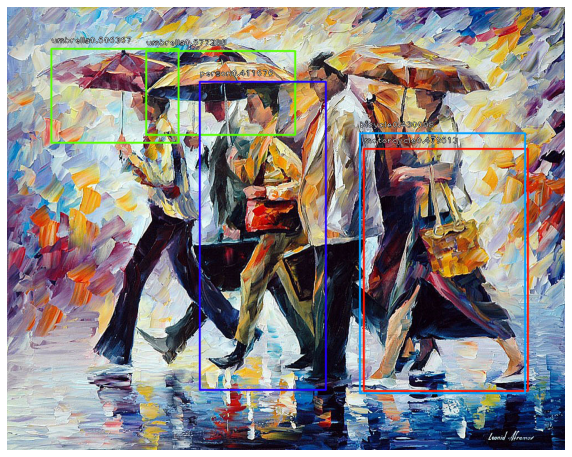

In [52]:
!wget https://afremov.com/images/product/image_2552.jpeg
show_image_with_predictions('image_2552.jpeg',0.4)

--2021-03-21 08:41:53--  https://i.pinimg.com/originals/b0/09/f3/b009f307907374ec2a1dd18d186ced88.jpg
Resolving i.pinimg.com (i.pinimg.com)... 184.29.84.193, 2600:1402:3800:287::1931, 2600:1402:3800:281::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|184.29.84.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47232 (46K) [image/jpeg]
Saving to: ‘b009f307907374ec2a1dd18d186ced88.jpg.1’

b009f307907374ec2a1 100%[===================>]  46.12K  --.-KB/s    in 0.02s   

2021-03-21 08:41:53 (1.86 MB/s) - ‘b009f307907374ec2a1dd18d186ced88.jpg.1’ saved [47232/47232]

img_shape: (443, 600, 3)


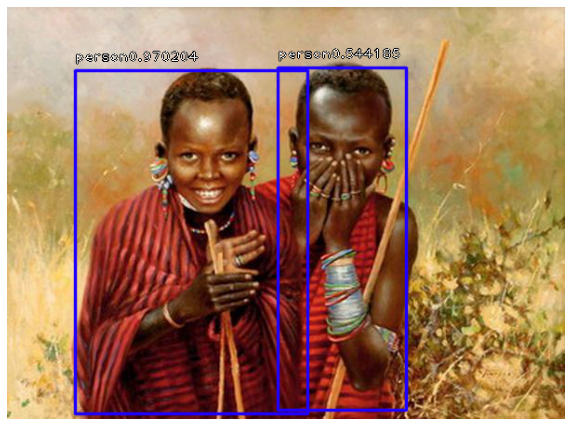

In [54]:
!wget https://i.pinimg.com/originals/b0/09/f3/b009f307907374ec2a1dd18d186ced88.jpg
show_image_with_predictions('b009f307907374ec2a1dd18d186ced88.jpg',0.5)